<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:#4361EE"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:blue"><center>Optimización: Gradiente descendiente estocástico</center></span>

<figure>
<center>
<img src="../Imagenes/sierra_nevada_santa_marta.jpg" width="600" height="600" align="center"/>
<figcaption>Sierra Nevada de Santa Marta </figcaption>
</center>
</figure>


Fuente: <a href="https://commons.wikimedia.org/wiki/File:Amanecer_en_la_Cuchilla_de_San_Lorenzo_-_Nevados_-_Sierra_Nevada_de_Santa_Marta_-_Flickr_-_Alejandro_Bayer_(1).jpg">Alejandro  Bayer Tamayo from Armenia, Colombia</a>, <a href="https://creativecommons.org/licenses/by-sa/2.0">CC BY-SA 2.0</a>, via Wikimedia Commons

## <span style="color:#4361EE">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Camilo José Torres Jiménez, Msc, cjtorresj@unal.edu.co
1. Daniel  Montenegro, Msc, dextronomo@gmail.com 

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com
5. Jessica López Mejía, jelopezme@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

6. Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

7. David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

8. Dairo Moreno, damoralesj@unal.edu.co
9. Joan Castro, jocastroc@unal.edu.co
10. Bryan Riveros, briveros@unal.edu.co
11. Rosmer Vargas, rovargasc@unal.edu.co
12. Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

13. Giovvani Barrera, udgiovanni@gmail.com
14. Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:#4361EE">Referencias</span> 

1. [Alvaro Montenegro y Daniel Montenegro, Inteligencia Artificial y Aprendizaje Profundo, 2022](https://github.com/AprendizajeProfundo/Diplomado)
1. [Alvaro Montenegro, Daniel Montenegro Campo Elías Pardo, y Oleg Jarma, Inteligencia Artificial y Aprendizaje Profundo Avanzado, 2022](https://github.com/AprendizajeProfundo/Diplomado-Avanzado)
1. [Alvaro Montenegro, Daniel Montenegro, Campo Elías Pardo y Oleg Jarma, Ciencia de datos, 2022](https://github.com/AprendizajeProfundo/diplomado-ciencia-de-datos)

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Métodos basados en el gradiente](#Métodos-basados-en-el-gradiente)
* [Gradiente descendiente en lote](#Gradiente-descendiente-en-lote)
* [Gradiente descendiente estocástico](#Gradiente-descendiente-estocástico)
* [Gradiente descendiente por mini-lotes](#Gradiente-descendiente-por-mini-lotes)
* [Método del momento](#Método-del-momento)
* [RMSprop](#RMSprop)
* [Algoritmo Adam](#Algoritmo-Adam)

## <span style="color:blue">Introducción</span>

La mayoría de los algoritmos la ciencia de datos implican la optimización de una función de valores reales. La optimización se refiere a la tarea de minimizar o maximizar alguna función $ f (\boldsymbol{\omega}) $ alterando $ \boldsymbol{\omega}$. Por lo general, expresamos la mayoría de los problemas de entrenamiento de un modelo en la ciencia de datos, y en particular en la inteligencia artificial  en términos de minimizar una función $f(\boldsymbol{\omega})$.


**Entenderemos la frase  minimizar una función $f(\boldsymbol{\omega})$ como un procedimiento para encontrar valor $\boldsymbol{\omega}^*$ de tal manera que $ f (\boldsymbol{\omega}^*) $ tenga el menor valor posible.**

Los matemáticos escriben esta frase en símbolos de la siguiente manera:

$$
\boldsymbol{\omega}^* = \underset{\boldsymbol{\omega}}{\operatorname{argmin}}  f(\boldsymbol{\omega}).
$$



La función que queremos minimizar  se llama función o criterio **objetivo (objetivo)**. Cuando estamos minimizando, también podemos llamarla función de costo, **función de pérdida** o función de error.


La búsqueda de un mínimo global puede ser una tarea muy dura en aprendizaje de máquinas si se tiene en cuenta que las funciones tienen muchas variables y consecuencia se tienen muchas dimensiones, por lo que no podemos *verlas*. En la siguiente imagen la función tiene dos variables (features). En aprendizaje de máquinas se pueden tener cientos  miles, millones y hasta miles de millones de variables (features). La siguiente imagen muestra una función con varios máximos y varios mínimos. La imagen muestra ejemplo típicos de funciones de pérdida asociadas al ajuste de redes neuronales.

<figure>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro_Fundamentos_Programacion/main/Pytorch/Imagenes/perdida_vgg56.png" width=300 height= 400 align="left" />      
</figure>

<figure>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro_Fundamentos_Programacion/main/Pytorch/Imagenes/perdida_Res.png" width=300 height= 400 align="right" />      
</figure>

Visualización funciones de pérdida modelos neuronales VGG56 y resnet56. Fuente: [University of Maryland](https://www.cs.umd.edu/~tomg/projects/landscapes/)

## <span style="color:blue">Métodos de optimización basados en el gradiente</span>

En esta lección vamos concentrarnos en las técnicas más modernas de optimización desarrolladas para el hacer posible el aprendizaje de máquinas. En este contexto se tiene que 

**<center>El problema de entrenar una máquina de aprendizaje es un problema de optimización</center>**

A menudo minimizamos las funciones que tienen múltiples entradas: $ f: \mathbb{R}^n \to \mathbb {R} $. 

Para que el concepto de "minimización" tenga sentido, debe haber una sola salida (función escalar).  Para funciones con múltiples entradas, se hace uso del concepto de derivadas parciales. La derivada parcial $\frac{\partial}{\partial w_i} f(\boldsymbol{\omega})$  mide como cambia (la velocidad a la que cambia) $f$  cuando la variable $w_i$ crece o decrece desde el punto  $\boldsymbol{\omega}$. 


El gradiente generaliza la noción de derivada al caso en que la derivada es con respecto a una dirección en el espacio. El gradiente de $ f $, denotado $ \nabla_{\boldsymbol{\omega}} f(\boldsymbol{\omega}) $,  es el vector que contiene todas las derivadas parciales. El elemento $ i $ del gradiente es la derivada parcial de f con respecto a $ w_i $.



En múltiples dimensiones, los *puntos críticos* son puntos donde cada elemento del gradiente es igual a cero. Por otro lado, se puede verificar que el gradiente $ \nabla_{\boldsymbol{\omega}}f (\boldsymbol{\omega}) $  es ese  vector que apunta en la dirección en la cual la función $f$ crece más rápidamente partiendo precisamente del punto $\boldsymbol{\omega}$. En consecuencia, $ -\nabla_{\boldsymbol{\omega}}f (\boldsymbol{\omega}) $ apunta en la dirección contraria, es decir en la dirección hacia la cual la función decrece más rápido, desde el punto $x$. Esta es la clave de los métodos de optimización basados en el gradiente. 

La siguiente imagen ilustra el gradiente proyectado en el plano $xy$ de la función $f(x,y)= -(\cos x^2 + \sin x^2)^2$.

<figure>
<center>
<img src="../Imagenes/gradient-cos.png" width="600" height="600" align="center"/>
</center>
</figure>


Fuente: <a href="https://commons.wikimedia.org/wiki/File:3d-gradient-cos.svg">MartinThoma</a>, CC0, via Wikimedia Commons

El término **gradiente descendiente** indica que se usará $ -\nabla_{\boldsymbol{\omega}}f (\boldsymbol{\omega}) $ para moverse a un siguiente punto en busca de un mínimo local. El método general se escribe como:

$$
\boldsymbol{\omega}^{(k+1)} = \boldsymbol{\omega}^{(k)} −  \eta_{k} \nabla_{\boldsymbol{\omega}} f(\boldsymbol{\omega}^{(k)})
$$

Los  valores  $\eta_k$ se denominan genéricamente  **tasa de aprendizaje**. La razón de incorporar la tasa de aprendizaje es controlar el tamaño de paso. Si no hace esta corrección podemos alejarnos en lugar de acercarnos al mínimo que se está buscando. El gif muestra como opera la técnica de gradiente descendiente en un función de dos variables.

<figure>
<center>
<img src="../Imagenes/Gradient_descent.gif" width="600" height="600" align="center"/>
</center>
</figure>


Fuente: <a href="https://commons.wikimedia.org/wiki/File:Gradient_descent.gif">Jacopo Bertolotti</a>, CC0, via Wikimedia Commons

Ilustración usando curvas de nivel de como ocurren las iteraciones en el método del gradiente descendiente.

<figure>
<center>
<img src="../Imagenes/Gradient_descent.png" width="400" height="400" align="center"/>
</center>
</figure>



Fuente: <a href="https://commons.wikimedia.org/wiki/File:Gradient_descent.png">Olegalexandrov at English Wikipedia</a>, Public domain, via Wikimedia Commons

## <span style="color:blue">Gradiente descendiente en lote</span>


En el método de gradiente  descendiente vainilla (vainilla se refiere al ejemplo básico), también conocido como descenso de gradiente por lotes, calcula el gradiente de la función de pérdida con respecto a los parámetros $\boldsymbol{\omega}$ para el **conjunto de datos de entrenamiento completo** $(\mathbf{x}_{train},\mathbf{y}_{train})$. Si $\mathfrak{L}$ es la función de pérdida del problema, entonces se tiene que 

$$
\boldsymbol{\omega}_{k+1} =  \boldsymbol{\omega}_k - \eta_k \nabla_{\boldsymbol{\omega}} \mathfrak{L}(\mathbf{x}_{train},\mathbf{y}_{train},\boldsymbol{\omega}_k),
$$


El principal problema a resolver con los métodos de gradiente descendiente es cómo definir y actualizar en cada paso la tasa de aprendizaje $\eta_k $. Un fragmento de código, en el cual se actualiza la tasa de aprendizaje podría lucir como sigue. Supongamos que al comenzar $0<\eta_0<1$. 

In [ ]:
def gd(theta, x_train, y_train, loss_func, epochs):
    for i in range (epochs):
        gradient = evaluate_gradient(loss_func, x_train, y_train, theta)
        theta -=  eta * gradient
        eta   *= eta
    return theta, gradient

## <span style="color:blue">Gradiente descendiente estocástico</span>

El descenso de gradiente estocástico (SGD), por el contrario, realiza una actualización de parámetros para cada ejemplo de entrenamiento $x_{train}^{(i)} $ y etiqueta $ y_{train}^ {(i)} $, **seleccionados al azar en cada época**.


$$
\boldsymbol{\omega}_{k+1} =  \boldsymbol{\omega}_k - \eta_k \nabla_{\boldsymbol{\omega}} \mathfrak{L}({x}_{train}^{(i)},{y}_{train}^{(i)},\boldsymbol{\omega}_k),
$$


En el artículo original de [Robbins and Monro (1951)](https://projecteuclid.org/download/pdf_1/euclid.aoms/1177729586) $\eta$ cambia en cada iteración como acabamos de mostrar y se asume que  $\{\eta_k\}$ es una sucesión tal que $\sum_k \eta_k = \infty$, and $\sum_k \eta_k^2 < \infty$. Por ejemplo, se puede escoger $\eta_k = 1/k$. Robbins y Monro demostraron que bajo condiciones muy generales este algoritmo converge a la solución de problema, con probabilidad 1. 

Un fragmento de código del algoritmo de Robbins and Monro podría lucir como sigue.

In [ ]:
def sgd(theta, data_train, loss_func, epochs):
    for i in range (epochs):
        np.random.shuffle (data)
        for example in data:
            x, y = example
            gradient = evaluate_gradient(loss_func,x, y, theta )
            theta = theta - eta * gradient
            eta *= eta
    return theta, gradient

## <span style="color:blue">Gradiente descendiente estocástico por mini-lotes</span>


El descenso de gradiente por mini-lotes finalmente toma lo mejor de los dos mundos anteriores y realiza una actualización para cada mini-lote de $n$ ejemplos de entrenamiento:


$$
\boldsymbol{\omega}_{k+1} =  \boldsymbol{\omega}_k - \eta_k \nabla_{\boldsymbol{\omega}} \mathfrak{L}(\mathbf{x}_{train}^{(i:i+n)},\mathbf{y}_{train}^{(i:i+n)},\boldsymbol{\omega}_k),
$$



Desde este punto de la lección, asumiremos que **tomamos mini-lotes**, por lo que omitimos súper-índices en los datos $(\mathbf{x}_{train}^{(i:i+n)},\mathbf{y}_{train}^{(i:i+n)})$ en todas las expresiones.

un fragmento de código para este método podría lucir como sigue:

In [ ]:
def sgd_mini_batch(theta, data_train, loss_func, epochs, batch_size):
    for i in range (epochs):
        np.random.shuffle (data_train)
        for batch in get_batches(data_train , batch_size = batch_size):
            x, y = batch
            gradient = evaluate_gradient(loss_func,x, y, theta )
            theta -=  eta * gradient
            eta *= eta
    return theta, gradient

El tamaño de los mini-lotes depende del problema y puede ser 32, 64, 128, etc. En el ejemplo,  *get\_batches()* es una función generadora que va entregando lotes de datos a la medida que el algoritmo los requiere. Para las TPU se esperan mini-lotes de tamaño que sea múltiplo de 128. 

### <span style="color:#4CC9F0">Discusión</span>

El método vainilla del descenso de gradiente  no garantiza una buena convergencia, y ofrece algunos desafíos que deben abordarse:

1. Elegir un ritmo de aprendizaje adecuado puede resultar complicado. Una tasa de aprendizaje demasiado pequeña conduce a una convergencia dolorosamente lenta, mientras que una tasa de aprendizaje demasiado grande puede dificultar la convergencia y hacer que la función de pérdida fluctúe alrededor del mínimo o incluso diverja.
2. Los horarios de actualización de la tasa de aprendizaje intentan ajustar la tasa de aprendizaje durante la entrenamiento, es decir, reducir la tasa de aprendizaje de acuerdo con un programa predefinido o cuando el cambio función de pérdida entre épocas cae por debajo de un umbral. Sin embargo, estos horarios y umbrales deben definirse con anticipación por lo que no pueden adaptarse a las características de un conjunto de datos.
3. Además, la misma tasa de aprendizaje se aplica a todas las actualizaciones de parámetros. Si nuestros datos son escasos y los valores de nuestras variables (características) tienen frecuencias muy diferentes, es posible que no queramos actualizarlas todas en la misma medida, sino realizar una actualización más grande para las características que ocurren con poca frecuencia.
4. Otro desafío clave al minimizar las funciones de error altamente no convexas comunes para las redes neuronales es evitar quedar atrapado en sus numerosos mínimos locales sub-óptimos. Algunos autores argumentan que, de hecho, la dificultad no surge de los mínimos locales sino de los puntos de silla, es decir, puntos donde una dimensión se inclina hacia arriba y otra hacia abajo. Estos puntos de silla suelen estar rodeados por una meseta del mismo error, lo que dificulta notablemente el escape de SGD, ya que el gradiente es cercano a cero en todas las dimensiones.

<figure>
<center>
<img src="../Imagenes/Gradient_ascent_chair.png" width="400" height="400" align="center"/>
<figcaption>Ejemplo de un punto de silla</figcaption>
</center>
</figure>



Fuente: [Wikipedia](https://en.wikipedia.org/wiki/Gradient_descent)

Para una revisión contemporáneas de los algoritmos de optimización modernos puede consultar [An overview of gradient descent optimization
algorithms](https://arxiv.org/pdf/1609.04747.pdf).

[Visualización SGD en Wikipedia](https://en.wikipedia.org/wiki/Gradient_descent#/media/File:Gradient_Descent_Example_Nonlinear_Equations.gif)

## <span style="color:blue">Método del momento</span>


SGD tiene problemas para navegar por los barrancos, es decir, áreas donde la superficie se curva mucho más abruptamente en una dimensión que en otra, que son comunes en los óptimos locales. En estos escenarios, SGD oscila a lo largo de las pendientes del barranco mientras solo avanza vacilante por el fondo hacia el óptimo local.

 El método del momento ayuda a acelerar SGD en la dirección relevante y amortigua oscilaciones. Lo hace sumando una fracción $\lambda$ del vector de actualización del paso anterior al vector de actualización actual. 
 
El método  se esquematiza como sigue

$$
\begin{align}
\mathbf{v}_k &= \lambda \mathbf{v}_{k-1} +  \eta \nabla_{\boldsymbol{\omega}} \mathfrak{L}({\mathbf{x}}_{train}^{(i:i+n)},{y}_{train}^{(i:i+n)},\boldsymbol{\omega}_k)\\
\omega_{k+1} &= \omega_{k} - v_k,
\end{align}
$$
$\lambda<1$. Usualmente, $\lambda= 0.9$.

## <span style="color:blue">RMSprop</span>

Desarrollado por Goeff Hinton, no publicado. Se basa en dividir la tasa de aprendizaje en cada paso por un promedio del cuadrado de las componentes del gradiente en el paso anterior, por cada componente $\omega$ del vector de parámetros $\boldsymbol{\omega}$.

Sea $g$ una componente genérica del gradiente asociada a $\omega$, entonces el método `RMSprop` es como sigue:

1. $E[g^2]_t= \lambda E[g^2]_{t-1} + (1-\lambda)g_t^2$
2. $\omega_{t+1} = \omega_t - \tfrac{\eta}{\sqrt{E[g^2]_t + \epsilon}}g_t$

$\epsilon >0$ es para evitar divisiones por cero. 

Las operaciones indicadas se realizan componente a componente.

- $\lambda$ es el parámetro de decaimiento. Típicamente $\lambda = 0.9$.
- $\eta$ es la tasa de aprendizaje. Típicamente el valor por defecto es 0.001.


## <span style="color:blue">Algoritmo Adam</span>

El algoritmo [Adam a method for Stochastic optimization](https://arxiv.org/pdf/1412.6980.pdf) de Kingma y Lei es actualmente el algortimo más utilizado en el entrenamiento de redes neuronales.


Adam (Adaptive Moment Estimation) es un algoritmo de optimización que  corresponde a una variación del algoritmo de descenso de gradiente estocástico (SGD). En el algoritmo se  actualizan iterativamente los pesos de la red para minimizar la función de pérdida.

Adam utiliza un enfoque de momento adaptativo para actualizar los pesos de la red. Es decir, el algoritmo ajusta las magnitudes de los gradientes de los pesos de la red para cada peso individual, en lugar de tener una única tasa de aprendizaje para todos los pesos. Esto significa que Adam puede adaptarse a diferentes tasas de aprendizaje para diferentes pesos y, por lo tanto, converge más rápido que SGD.

El algoritmo de Adam calcula una estimación del momento de primer orden (media móvil de los gradientes) y de segundo orden (media móvil de los gradientes al cuadrado) para cada peso de la red. A partir de estas estimaciones, se calcula una actualización de los pesos que tiene en cuenta tanto la dirección del gradiente como la magnitud de las variaciones históricas.

En cada iteración, Adam calcula la tasa de aprendizaje adaptativa para cada peso de la red, y utiliza estas tasas de aprendizaje para actualizar los pesos en función de la estimación del momento de primer y segundo orden.



El siguiente es el algoritmo.

### <span style="color:#4CC9F0">El algortimo</span>

El símbolo  $g^2_t$ indica los elementos del producto de Hadamard (componente por componente)  $g_t\bigodot g_t$. Según los autores, los mejores resultados han sido obtenidos para los valores de los hiperparámetros  $\alpha = 0.001$, $\beta_1 = 0.9$, $\beta_2 = 0.999$ y $\epsilon = 10−8$. Todas operaciones entre vectores son hechas componente por componente (producto de Hadamard). con $\beta_1^t$ and $\beta_2^t$ se denota la potencia $t$-ésima.

A. Incialización de parámetros e hiperparámetros para el algortimo

1.  - Requerido: $\alpha$: Valor de salto (Stepsize)
    - Requerido: $\beta_1^t$ y $\beta_2^t \in [0, 1)$. Ratas de decaimiento exponencial para la estimación de los momentos.
    - Requerido: $f(\boldsymbol{\omega})$: Función de pérdida objetivo con parámetros $\boldsymbol{\omega}$.
    - Requerido: $\boldsymbol{\omega}_0$: Vector de valores iniciales del vector de parámetros.
    - $m_0  = 0$. Inicialización del vector momento de primer orden. 
    - $v_0 =  0$. Inicialización del vector momento de segundo orden.
    - $t =  0$. Inicialización del contador de iteraciones.
    - N = 100. Máximo de iteraciones.

B. Mientras $t<N$ y $||\omega_t - \omega_{t-1}||>\delta$.  Mientras no haya convergencia

2. $t  = t + 1$. contador de iteraciones.
3. $g_t =  \nabla f_t(\omega_{t-1})$.  Gradiente. 
4. $m_t  = \beta_1 m_{t−1} + (1 − \beta_1) g_t$. Vector de  momentos de primer orden.
5. $v_t  = \beta_2 v_{t−1} + (1 − \beta_2)  g_t^2$. Vector de  momentos de segundo orden.
6. - $\hat{m}_t  = \frac{m_t}{1 − \beta_1^t}$. Corrección de sesgo  del vector de momentos de primer orden.
   - $\hat{v}_t  = \frac{v_t}{1 − \beta_2^t}$. Corrección de sesgo  del vector de momentos de segundo orden.
7. $\omega_t =   \omega_{t-1}  - \alpha  \frac{\hat{m}_t}{\sqrt{\hat{v}_t + epsilon}}$. Actualización de los parámetros.
8. Fin mientras (Repite los pasos 2-7, hasta convergencia)


### <span style="color:#4CC9F0">Explicación detallada del algortimo</span>

A continuación se presenta una explicación paso a paso del algoritmo:

1. Inicialización de parámetros: Se inicializan los pesos de la red y se establecen los parámetros del algoritmo Adam. Esto incluye la tasa de aprendizaje inicial, los parámetros de momentum ($\beta_1$ y $\beta_2$), el epsilon  ($\epsilon$) un valor pequeño utilizado para evitar divisiones por cero), y el contador de iteraciones $t$.

2. Actualización del contador de iteraciones: El contador de iteraciones se incrementa en uno. 

3. Cálculo del gradiente: Se selecciona un mini-batch de datos de entrenamiento y se calcula el gradiente de la función de pérdida con respecto a los pesos de la red.

4. Cálculo del momento de primer orden: Se calcula una estimación del momento de primer orden, que es la media móvil de los gradientes anteriores. Esto se hace multiplicando el gradiente actual por el parámetro $\beta_1$  y sumando el resultado con el producto del momento anterior por $1 - \beta_1$.

5. Cálculo del momento de segundo orden: Se calcula una estimación del momento de segundo orden, que es la media móvil de los gradientes al cuadrado anteriores. Esto se hace multiplicando el gradiente actual al cuadrado por el parámetro$\beta_2$ y sumando el resultado con el producto del momento anterior al cuadrado por $1 - \beta_2$.

6. Corrección de los momentos: Los momentos de primer y segundo orden se corrigen para tener en cuenta el hecho de que los momentos son inicializados en cero y por lo tanto son sesgados hacia cero en las primeras iteraciones. Esto se hace dividiendo cada momento por $\beta_2^t$ y $1-\beta_2^t$, respectivamente.

7. Actualización de los pesos: Los pesos se actualizan utilizando las estimaciones de momento de primer y segundo orden. Esto se hace multiplicando el momento de primer orden corregido por la tasa de aprendizaje y dividiendo el resultado por la raíz cuadrada del momento de segundo orden corregido más epsilon. Los pesos se actualizan restando el resultado de la actualización de los pesos anteriores.

8. Repetir: Se repiten los pasos 2-7 para cada mini-batch de datos de entrenamiento hasta que se haya completado un número predeterminado de iteraciones o alcanzar convergencia.

## <span style="color:blue">Ejemplo de implementación y uso del algortimo Adam</span>

Terminamos esta lección una una implementación completa de un problema de clasificación en dos clases. 

Para correr los siguientes códigos necesita tener instalado Tensorflow, Matplotlib y Numpy. Revise la siguiente línea y ejecute los comandos según el caso. Instale inicialmente Tensorflow, no necesitara instalar Numpy, porque se instala automáticamente.

In [ ]:
# !conda install -c conda-forge tensorflow
# !conda install -c conda-forge matplotlib
# !conda install -c anaconda numpy

### <span style="color:#4CC9F0">Generamos los datos</span>

Generamos una muestra de a partir de la distribución normal estándar. En seguida separamos en dos clase, desplazando la mitad de los datos. El desplazamiento es de tamaño 2.5.

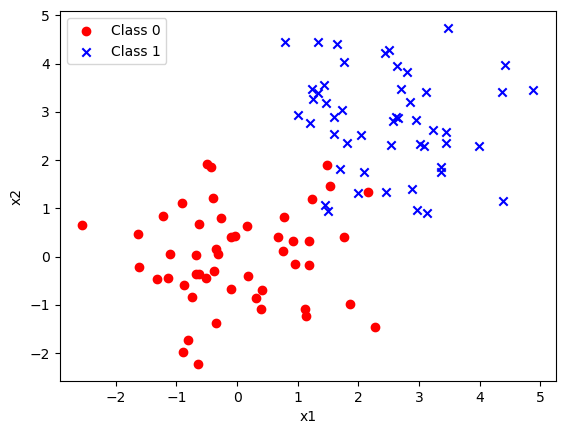

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Generar un conjunto de datos de muestra
np.random.seed(0)
x = np.random.randn(100, 2)
y = np.random.randint(0, 2, (100, 1))

# Separar los puntos de datos en dos grupos basados en su clase
class_0 = x[y.ravel() == 0]
class_1 = x[y.ravel() == 1]
class_1 += 2.5

# Recodifica la matriz de datos
x[y.ravel() == 1] += 2.5

# Graficar los puntos de datos
plt.scatter(class_0[:, 0], class_0[:, 1], marker='o', color='red', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], marker='x', color='blue', label='Class 1')
plt.legend(loc='upper left')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


### <span style="color:#4CC9F0">Clase Adam</span>

Compare la implementación siguiente con el algoritmo descrito arriba.

In [4]:
import numpy as np

class Adam:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0

    def update(self, w, grad_wrt_w):
        '''
        w: vector de parámetros (pesos)
        grad_wrt_w: gradiente de la función de pérdida con respecto a w.
        '''
        if self.m is None:
            self.m = np.zeros_like(w)
            self.v = np.zeros_like(w)

        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad_wrt_w
        self.v = self.beta2 * self.v + (1 - self.beta2) * np.square(grad_wrt_w)
        m_hat = self.m / (1 - self.beta1**self.t)
        v_hat = self.v / (1 - self.beta2**self.t)
        w = w - self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return w


### <span style="color:#4CC9F0">Función predictora. Modelo logístico</span>

Para este ejemplo usaremos un modelo logístico como función de predicción. En el problema tenemos dos clases: clase 0 y clase 1, de acuerdo a lo que hicimos previamente. Tenemos dos variables predictoras $x_1$ y $x_2$ respectivamente. El vector predictor se denota $\mathbf{x}=(x_1,x_2)$.

EL vector de parámetro o pesos de nuestro modelo será $\boldsymbol{\omega} = (w_1,w_2)$. Este es el vector que deseamos estimar. La función de predicción dada por el modelo logístico es el `sigmoide` definido por:

$$
\hat{y} = f(\mathbf{x}|\boldsymbol{\omega}) = \frac{1}{1 + \exp{(-\boldsymbol{\omega}'\mathbf{x})}}
$$

Observe que $\hat{y}$ es un número real en el intervalo [0,1] que interpretamos como la probabilidad de que la muestra $\mathbf{x}$ provenga de la clase 1. Para usos prácticos la decisión se toma 'cuidadosamente', así:

1. Si $\hat{y}<0.5$ la muestra $\mathbf{x}$ proviene de la clase 0.
2. Si $\hat{y}\ge 0.5$ la muestra $\mathbf{x}$ proviene de la clase 1.



In [ ]:
import tensorflow as tf

def sigmoid(w,x):
    '''
    Función de predictora logística o sigmoide
    f_w(x) = 1/(1+ w'x)
    '''
    y_hat = 1 / (1 + tf.exp(-tf.matmul(x, w))) 
    return y_hat

### <span style="color:#4CC9F0">Función de pérdida. - log verosimilitud</span>

La función de perdida en este problema es dada por -log verosimilitud del problema. No se preocupe si no entiende de momento el concepto estadístico de trasfondo. Por esta lección lo importante es saber que esta es la función que vamos a optimizar. 

Si tenemos variables predictoras $\mathbf{x}_i$ y etiquetas $y_i$ respectivamente para $i=1,\ldots,N$, la -log verosimilitud del problema es dada por

$$
\mathfrak{L}(\boldsymbol{\omega}|\mathbf{x}) = -\frac{1}{N}\sum_{i=1}^N[y_i \log f(\mathbf{x}_i|\boldsymbol{\omega}) +(1-y_i)(log (1- f(\mathbf{x}_i|\boldsymbol{\omega})] = \frac{1}{N}\sum_{i=1}^N[y_i \log \hat{y}_i +(1-y_i)(log (1- \hat{y}_i)]
$$

In [6]:
def loss_f(y, y_pred):
    loss = -tf.reduce_mean(y * tf.math.log(y_pred) + (1 - y) * tf.math.log(1 - y_pred))
    return loss

### <span style="color:#4CC9F0">Entrenamiento: Optimización</span>

In [8]:
import numpy as np
import tensorflow as tf


# Inicializar pesos aleatorios y modelo
np.random.seed(1)
w = tf.Variable(np.random.randn(2, 1))
optimizer = Adam()

# Bucle de entrenamiento
losses = []
accuracies = []
N = 600
for i in range(N):
    with tf.GradientTape() as tape:
        # Forward pass: calcular la función de pérdida
        y_pred = sigmoid(w,x)
        loss = loss_f(y, y_pred)
    # Backward pass: calcular el gradiente de la función de pérdida con respecto a w
    grad = tape.gradient(loss, w)

    # Actualizar los pesos utilizando el optimizador Adam
    w.assign(optimizer.update(w.numpy(), grad.numpy()))
    # Agregar la función de pérdida actual a la lista de pérdidas
    losses.append(loss.numpy())
    
    # Calcula la precisión
    y_pred_decode =  np.squeeze((sigmoid(w,x)<0.5)).astype(int)
    acc = np.mean(abs(np.squeeze(y) -  y_pred_decode))
    accuracies.append(acc)
    # imprime en la consola
    if (i+1)%100 ==0: 
        print(f'Epoch {i+1}: loss={loss:.4f},  accuracy={acc:.4f}')

Epoch 100: loss=0.5970,  accuracy=0.7500
Epoch 200: loss=0.5679,  accuracy=0.7500
Epoch 300: loss=0.5423,  accuracy=0.7700
Epoch 400: loss=0.5201,  accuracy=0.7700
Epoch 500: loss=0.5010,  accuracy=0.7900
Epoch 600: loss=0.4849,  accuracy=0.7900


### <span style="color:#4CC9F0">Solución del ejemplo</span>

In [9]:
print('Vector de pesos w = {}'.format(w.numpy()))

Vector de pesos w = [[ 1.01464517]
 [-0.0837136 ]]


### <span style="color:#4CC9F0">Gráficas de las funciones de pérdida y de la precisión</span>

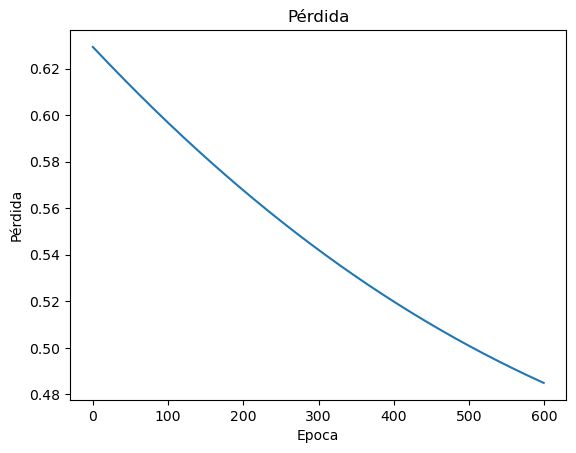

In [10]:
import matplotlib.pyplot as plt

# Graficar la función de pérdida
plt.plot(losses)
plt.xlabel('Epoca')
plt.ylabel('Pérdida')
plt.title('Pérdida')
plt.show()

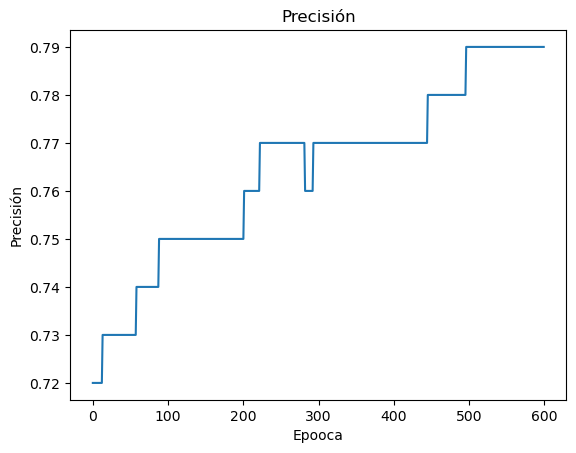

In [11]:
import matplotlib.pyplot as plt

# Graficar la función de precisión
plt.plot(accuracies)
plt.xlabel('Epooca')
plt.ylabel('Precisión')
plt.title('Precisión')
plt.show()

### <span style="color:#4CC9F0">Bonus: Clase Optim</span>

Dejamos como ejercicio completar la siguiente class Optim para el problema

In [15]:
class Optim:
    def __init__(self, predictor, loss, optimizer,n_iter=500, w0=None, clases=2, delta_print=100):
        self.predictor = predictor
        self.loss_f = loss
        self.optimizer = optimizer
        self.N = n_iter
        self.delta_print = delta_print
        losses = []
        accuracies = []
        if w0 is None:
            self.w = tf.Variable(np.random.randn(clases, 1))
        else:
            self.w = w0
            
        
    def fit(self):
        for i in range(N):
            with tf.GradientTape() as tape:
                # Forward pass: calcular la función de pérdida
                y_pred = self.predictor(w,x)
                loss = self.loss_f(y, y_pred)
            # Backward pass: calcular el gradiente de la función de pérdida con respecto a w
            grad = tape.gradient(loss, w)

            # Actualizar los pesos utilizando el optimizador Adam
            self.w.assign(optimizer.update(self.w.numpy(), grad.numpy()))
            # Agregar la función de pérdida actual a la lista de pérdidas
            self.losses.append(loss.numpy())

            # Calcula la precisión
            y_pred_decode =  np.squeeze((sigmoid(w,x)<0.5)).astype(int)
            acc = np.mean(abs(np.squeeze(y) -  y_pred_decode))
            self.accuracies.append(acc)
            # imprime en la consola
            if (i+1)% self.delta_print == 0: 
                print(f'Epoch {i+1}: loss={loss:.4f},  accuracy={acc:.4f}')
        